## 형태소 분석을 통한 TF-IDF 벡터 만들기

In [2]:
from konlpy.tag import Twitter
import pandas as pd

# 연합뉴스 로딩
kor_corpus = pd.read_csv(r'한류_연합뉴스.csv', encoding='cp949')

pos_tagger = Twitter()

# 한글 문서 명사만 뽑아서 tf-idf
total_news = []
stopword = ['것','수','저']

for news in kor_corpus['contents'].head():
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [3]:
# 데이터 확인
kor_corpus.head()

,time,title,contents
0,2016/08/09 16:44,에스테틱 미용 시장 개척하는 광주 노아 메디컬,(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...
1,2016/08/09 15:37,청소년 노래·춤 경연 'LG드림페스티벌'…총상금 5천만원,(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...
2,2016/08/09 15:32,"고신대병원, 카자흐스탄에 두 번째 거점센터",(부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...
3,2016/08/09 15:19,국제패션문화페스티벌 자원봉사자 모집,(대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...
4,2016/08/09 14:42,"""中한류 일정 대부분 정상 진행…좋은 콘텐츠로 다가가야""",(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...


In [4]:
kor_corpus['contents'][1]

"(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '제16회 LG드림페스티벌'이 시작됐다.  LG경북협의회는 내달 4일까지 홈페이지(www.lgcog.co.kr)에서 신청을 받아 9월 10일부터 10월 8일까지 행사를 치른다. 전체기사 본문배너 가요·그룹댄스·국악 등 3개 부문으로 진행해 부분별 대상에 500만원, 금상 300만원, 은상 200만원, 동상 100만원을 수여한다. 총상금은 5천만원이다. LG경북협의회장상과 여성가족부 장관상, 경북도지사상, 경북도교육감상, 구미시장상을 준다. 9세부터 24세까지 누구나 참가할 수 있다. 가요·그룹댄스 부문의 경우 내달 10일 서울지역 예선(서울경향아트힐), 9월 11일 부산지역 예선(부산디자인센터), 9월 24일 구미지역 예선(경운대학교)이 각각 열린다. 10월 1일 본선에서 TOP3 경연팀을 선발한 뒤 10월 8일 구미시민운동장에서 열리는 본 행사에서 대상팀을 선정한다. 국악부문은 9월 25일 구미경운대에서 당일 행사로 진행된다. LG드림페스티벌을 통해 GOD의 김태우, 십센치(10cm)의 권정열, 한류스타 황치열, 팝핀 여제 주민정, 트로트 가수 류원정 등 많은 스타가 발굴됐다고 한다. 자세한 내용은 홈페이지를 참고하거나 사무국(053-381-8071)으로 문의하면 된다."

In [5]:
# total_news list 확인
total_news[1]

'구미 연합뉴스 박순 기 기자 노래 춤 경연 청소년 꿈 열정 제 회 드림 페스티벌 이 시작 경북 협의 회 내달 일 홈페이지 에서 신청 월 일 월 일 행사 전체 기사 본문 배너 가요 그룹 댄스 국악 등 개 부문 부분 별 대상 만원 금 만원 은상 만원 동상 만원 수여 총상 금은 천만원 경북 협의 회장 여성가족부 장관 경북 도지사 경북 교육감 구미시장 준 세 세 누구 가요 그룹 댄스 부문 경우 내달 일 서울 지역 예선 서울 경향 아트 힐 월 일 부산 지역 예선 부산 디자인 센터 월 일 구미 지역 예선 경운대 학교 이 각각 월 일 본선 경연 팀 선발 뒤 월 일 구미 시민운동 행사 대상 팀 국악 부문 월 일 구미 경운대 당일 행사 드림 페스티벌 통해 의 김태우 십센치 의 권정열 한류 스타 황 치열 팝핀 여제 주민 정 트로트 가수 류 원정 등 스타 발굴 내용 홈페이지 사무국 문의'

In [6]:
# tf-idf 벡터 만들기
from sklearn.feature_extraction.text import CountVectorizer

kor_vectorizer = CountVectorizer(min_df=1) # 등장하는 단어들에 대한 오브젝트
kor_bow = kor_vectorizer.fit_transform(total_news) # 딕셔너리에 실제 단어들을 입력

In [7]:
print(kor_bow)

  (0, 29)	4
  (0, 204)	1
  (0, 199)	1
  (0, 53)	1
  (0, 61)	1
  (0, 333)	1
  (0, 105)	2
  (0, 132)	3
  (0, 196)	6
  (0, 173)	5
  (0, 4)	1
  (0, 282)	4
  (0, 194)	3
  (0, 68)	1
  (0, 66)	3
  (0, 262)	1
  (0, 52)	1
  (0, 348)	3
  (0, 48)	2
  (0, 6)	1
  (0, 175)	1
  (0, 271)	1
  (0, 123)	2
  (0, 226)	1
  (0, 301)	1
  :	:
  (4, 181)	1
  (4, 260)	1
  (4, 30)	1
  (4, 176)	1
  (4, 38)	1
  (4, 193)	1
  (4, 202)	2
  (4, 190)	2
  (4, 133)	1
  (4, 45)	1
  (4, 247)	1
  (4, 249)	1
  (4, 272)	1
  (4, 75)	1
  (4, 305)	1
  (4, 267)	1
  (4, 59)	1
  (4, 306)	1
  (4, 15)	1
  (4, 85)	1
  (4, 22)	1
  (4, 259)	1
  (4, 106)	1
  (4, 77)	1
  (4, 349)	1


In [8]:
print(kor_vectorizer.get_feature_names()[:10])
kor_bow.toarray()

['가수', '가요', '각각', '개정', '개척', '거점', '건강', '검진', '견실', '견지해']


array([[0, 0, 0, ..., 1, 0, 1],
       [1, 2, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [9]:
# 생성한 TF-bow를 가지고 tf-idf 생성하기

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(kor_bow.toarray())

In [10]:
tfidf.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.06236855,
         0.        ,  0.06236855],
       [ 0.07572825,  0.1514565 ,  0.06109707, ...,  0.        ,
         0.07572825,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.05084439, ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
# 간단한 예제

ex_text = ["한국 김치 ",
          "한국 미국 FTA FTA ",
          "한국 미국 "]

kor_vectorizer = CountVectorizer(min_df=1)
kor_bow = kor_vectorizer.fit_transform(ex_text)

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())
print(kor_vectorizer.get_feature_names())
print(kor_bow.toarray())
print(tfidf.toarray())

['fta', '김치', '미국', '한국']
[[0 1 0 1]
 [2 0 1 1]
 [0 0 1 1]]
[[ 0.          0.861037    0.          0.50854232]
 [ 0.90100815  0.          0.34261996  0.26607496]
 [ 0.          0.          0.78980693  0.61335554]]


- 모든 문서에서 나타난 '한국'은 두 문서에서 나온 '미국'과 비교 했을때 frequency는 1로 같으나 idf를 고려하면 더 낮은 값을 확인할 수 있음
- 각각 문서에서 frequency가 1인 '한국', '미국', '김치'는 idf를 고려하면 '한국'<'미국'<'김치'가 됨
- 한 문장에서만 나온 '김치'와 'FTA'를 비교하면 빈도수가 높은 'FTA'가 더 높은 TF-IDF를 가지고 있는걸 확인할 수 있음
-  Text data의 numerical type의 input matrix 생성 완료!

### 워드 클라우드 TF v.s. TFIDF

In [12]:
from wordcloud import WordCloud

# 폰트 지정
wordcloud = WordCloud(font_path = r'C:\Windows\Fonts\Daum_SemiBold.ttf')

# 인코딩을 고려한 데이터 로딩
yonhap = pd.read_csv("한류_연합뉴스.csv", encoding = 'cp949')['contents']

In [13]:
# 계산 속도를 고려하여 200개만 사용

# TF bow 생성
kor_vectorizer = CountVectorizer(min_df=1)
kor_bow = kor_vectorizer.fit_transform(yonhap[:200])

# TF-IDF bow 생성
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

#### TF기반 워드 클라우드

In [14]:
kor_corpus['contents'][20]

'(부산=연합뉴스) 김상현 기자 = 아시아 대중음악 축제인 아시아송페스티벌이 10월 7일부터 9일까지 부산아시아드 경기장에서 열린다. 부산시는 10월 7일과 8일 부산아시아드 보조경기장에서 2016 아시아송페스티벌 전야행사를 하고, 10월 9일 부산아시아드 주경기장에서 본행사를 한다고 밝혔다. 2014년부터 시작한 아시아송페스티벌은 대중음악을 매개체로 아시아의 화합과 문화교류 활성화를 도모한다. 전체기사 본문배너 올해 축제는 대한민국을 대표하는 K팝 아티스트와 중국, 일본, 베트남, 싱가포르, 인도네시아, 필리핀 등 아시아 주요 국가들의 최정상급 아티스트가 대거 출연한다. 10월 9일 열리는 본행사에는 엑소, NCT 127, 세븐틴, 트와이스, AOMG 사이먼 도미닉 등이 참여를 확정해 아시아 한류팬들의 관심을 불러일으킬 것으로 기대된다. 행사를 주최하는 한국음악콘텐츠산업협회 최광호 사무국장은 "아시아송페스티벌 한국 대표를 선발하기 위해 공인 음악차트인 \'가온차트\'의 음원, 음반 판매량, 각종 SNS 등을 참고했다"며 "올해 행사에 출연하는 한국 대표는 각 부문 2016년 상반기 최고 가수라고 해도 과언이 아니다"라고 말했다. 해외 가수의 경우 해외 유명 레이블과 세계적인 음반사 등에서 신청한 가수 가운데 20여 명의 아티스트를 1차 후보군에 올려 최종 선발작업을 벌이고 있다. 올해 아시아송페스티벌은 부산시와 한국음악콘텐츠산업협회가 공동 주최하고 문화체육관광부가 후원한다. 엠넷에서 TV로 방영한다.'

In [15]:
# word_cloud 형태 데이터 타입으로 변환
word_tf = zip(kor_vectorizer.get_feature_names(),kor_bow.toarray()[20])

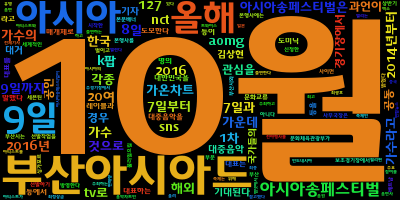

In [16]:
wordcloud.generate_from_frequencies(word_tf).to_image()

#### TF-IDF기반 워드 클라우드

In [17]:
word_tfidf = zip(kor_vectorizer.get_feature_names(),tfidf.toarray()[20])

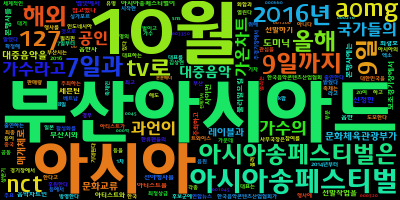

In [18]:
wordcloud.generate_from_frequencies(word_tfidf).to_image()

### 연어(collocation) 예제

In [19]:
from konlpy.corpus import kolaw
from konlpy.utils import pprint
from nltk import collocations
from konlpy.tag import Kkma

measures = collocations.BigramAssocMeasures()
#doc = kolaw.open('constitution.txt').read()
doc = open('대통령_취임사.txt','r').read()
print('\nCollocations among tagged words:')

tagged_words = Kkma().pos(doc)
finder = collocations.BigramCollocationFinder.from_words(tagged_words)
pprint(finder.nbest(measures.pmi, 10)) # top 5 n-grams with highest PMI

print('\nCollocations among words:')
words = [w for w, t in tagged_words]
ignored_words = [u'안녕']
finder = collocations.BigramCollocationFinder.from_words(words)

finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(3) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 10))

print('\nCollocations among tags:')
tags = [t for w, t in tagged_words]
finder = collocations.BigramCollocationFinder.from_words(tags)
pprint(finder.nbest(measures.pmi, 5))


Collocations among tagged words:
[(('21', 'NR'), ('세기', 'NNG')),
 (('5', 'NR'), ('천', 'NR')),
 (('·', 'SP'), ('무형', 'NNG')),
 (('각종', 'NNG'), ('불공정', 'NNG')),
 (('경축', 'NNG'), ('사절', 'NNG')),
 (('계와', 'MAG'), ('품앗이', 'NNG')),
 (('그리고', 'MAG'), ('이러하', 'VA')),
 (('근심', 'NNG'), ('없이', 'MAG')),
 (('글로', 'MAG'), ('벌', 'VV')),
 (('남북', 'NNG'), ('간', 'NNB'))]

Collocations among words:
[('과학', '기술'),
 ('문화', '융성'),
 ('경제', '부흥'),
 ('창조', '경제'),
 ('국가', '발전'),
 ('바라', 'ㅂ니다'),
 ('국민', '여러분'),
 ('국민', '여러'),
 ('행복', '시대'),
 ('우리', '대한민국')]

Collocations among tags:
[('XR', 'XSA'), ('NR', 'NNM'), ('JC', 'OL'), ('MAC', 'SS'), ('VXV', 'EPH')]


In [20]:
measures = collocations.TrigramAssocMeasures()
#doc = kolaw.open('constitution.txt').read()
doc = open('대통령_취임사.txt','r').read()
print('\nCollocations among tagged words:')

tagged_words = Kkma().pos(doc)
finder = collocations.TrigramCollocationFinder.from_words(tagged_words)
pprint(finder.nbest(measures.pmi, 10)) # top 5 n-grams with highest PMI

print('\nCollocations among words:')
words = [w for w, t in tagged_words]
ignored_words = [u'안녕']
finder = collocations.TrigramCollocationFinder.from_words(words)

finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(3) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 10))

print('\nCollocations among tags:')
tags = [t for w, t in tagged_words]
finder = collocations.TrigramCollocationFinder.from_words(tags)
pprint(finder.nbest(measures.pmi, 5))


Collocations among tagged words:
[(('5', 'NR'), ('천', 'NR'), ('년', 'NNB')),
 (('년', 'NNB'), ('유', 'NNG'), ('·', 'SP')),
 (('드립', 'NNG'), ('니', 'VV'), ('다', 'ECS')),
 (('밤새', 'NNG'), ('불이', 'NNG'), ('꺼지', 'VV')),
 (('부탁', 'NNG'), ('드립', 'NNG'), ('니', 'VV')),
 (('여성', 'NNG'), ('이나', 'JC'), ('장애인', 'NNG')),
 (('영하', 'NNG'), ('수십', 'NR'), ('도', 'NNM')),
 (('유', 'NNG'), ('·', 'SP'), ('무형', 'NNG')),
 (('이나', 'JC'), ('장애인', 'NNG'), ('또는', 'MAG')),
 (('이상', 'NNG'), ('핵과', 'NNG'), ('미사일', 'NNG'))]

Collocations among words:
[('국민', '행복', '시대')]

Collocations among tags:
[('VXV', 'EPH', 'ETN'),
 ('XR', 'XSA', 'ETN'),
 ('SP', 'MAC', 'SS'),
 ('SS', 'SP', 'MAC'),
 ('ECS', 'VXV', 'EPH')]


### 문서비교 - 유사 문서 검색

- 각각의 문서를 bag-of-words를 이용해 수치형 벡터로 표현하고 문서끼리 얼마나 가까운지 similarity를 계산하여 비교해보자

In [21]:
import re

total_news = []
stopword = ['것','수','저']

for news in yonhap[:1000]:
    pos_news = re.sub('.* 기자 = ', '', news) # 한 기자가 많은 기사를 작성. 기자명 때문에 유사한 것으로 계산될 수 있으니 이를 제거하자
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(pos_news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [22]:
kor_vectorizer = CountVectorizer(min_df=10)
kor_bow = kor_vectorizer.fit_transform(total_news)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(kor_bow[0], kor_bow)

array([[ 1.        ,  0.11375002,  0.05443311,  0.06488857,  0.15278266,
         0.10169504,  0.07067463,  0.17142067,  0.04170288,  0.09312404,
         0.10893319,  0.07647607,  0.05025189,  0.1030303 ,  0.05907646,
         0.10210625,  0.13245324,  0.22749346,  0.17622809,  0.06626221,
         0.0710478 ,  0.41344057,  0.12479613,  0.07873409,  0.07336607,
         0.09089031,  0.06081303,  0.12177236,  0.10302232,  0.11231009,
         0.06101546,  0.12175234,  0.04912836,  0.05634362,  0.06740802,
         0.09136021,  0.09740095,  0.13225059,  0.05994742,  0.0713624 ,
         0.13535101,  0.03823596,  0.08970628,  0.1069611 ,  0.1164848 ,
         0.17960051,  0.13149863,  0.11715032,  0.08504201,  0.10606602,
         0.07638263,  0.09117943,  0.12916591,  0.12520804,  0.07662204,
         0.10737427,  0.06344892,  0.20050049,  0.08568485,  0.09751896,
         0.0942809 ,  0.11769166,  0.10010242,  0.09052239,  0.08119979,
         0.11369851,  0.09547299,  0.15830396,  0.1

In [24]:
# 거리가 가까운 순서대로 정렬
idx = (-cosine_similarity(kor_bow[0], kor_bow)[0]).argsort()
print(idx)

[  0 604  21 503 883 172 498 196 440 416 552 877 895 685 393 264  69 740
 309 671 222 287 723 770  71 917  91 187 737 272 628 463 680 733 487 594
 768 765 232 369 349 243 800 553 267 305 271 427 506 525 665 933  17 712
 891 261 417 806 964  97 587 849 970 471 160 203 280 676 682 753 497 850
 747 585 551 642 228 386 161 268 363 283 558 785 661 713  57 675 457 629
 154 382 906 554 511 320 719 184 687 175 492 724 876 926 273 201 826 882
 958 759 938 957 355  45 360 752 426 389 582 242 677 911  18 147 617 218
 567 379 973 887 447 255 337 931   7 951 405 584 215 784 779 269 491 997
 475 916 907 708 634 884 178 881 202 144 496 683 641 177 181 515 942 560
 460 306 352 912 129 343 871 855  67 472  85 946 376 944 104  99 354   4
 975 913 489 788 109 532 346 798 149 864 189 711 336 643 152 134 115 890
 994 456 857 230 125 302 490 290 928 274 823 974 420 561 356 845 778 763
 289 648 969 399 388 128 136  94  74 971 419 742 236 624 610 167  40 213
 725 477 185 614 512 573 529 378 135 480  16  89  3

#### tf에 대해

In [25]:
# idx에서 자기 자신을 뺀 두번째 index 즉 idx[1] 리턴! // 이전까지는 intuition
def find_most_similar_news(index, bow, corpus):
    idx = (-cosine_similarity(bow[index], bow)[0]).argsort()[1]
    return corpus[idx]

In [26]:
# idx=300인 문서에 대해 유사 문서 검색 결과 확인 
idx = 300

yonhap[idx]

'(서울=연합뉴스) 곽명일 기자 = 북한당국이 주민을 상대로 자본주의 문화에 대한 단속과 통제를 강화하고 있지만, \'태양의 후예\'와 같은 한국 드라마를 몰래 시청하는 북한 주민들이 많다고 북한 전문매체인 데일리NK가 4일 보도했다. 평안남도 소식통은 이 매체에 "최근 젊은 청년들 속에서 \'태양의 후예\'라는 한국 드라마가 인기를 끌면서 날이 새는 줄도 모르고 시청하고 있다"면서 "이 드라마에 대한 소문이 퍼지자 어른·아이 할 것 없이 너도나도 (드라마를) 보기 위해 애쓰고 있는 상황"이라고 전했다. 소식통은 이어 "시장에서 상인들에게 다가가 \'아랫동네\'(한국)것이 없느냐\'고 슬쩍 말을 건네면 대뜸 \'태양의 후예\'를 소개한다"며 "새 드라마 원본(CD)은 5만 원(한국 돈 7천 원)에 판매되고, 복사본은 그 절반 값에 거래된다"고 설명했다. 전체기사 본문배너 그러면서 "(주민들은)\'200일 전투\'의 쌓인 피로를 한국 드라마를 시청하거나 가요를 감상하면서 해소한다"며 "한류의 확산으로 볼거리가 없는 조선중앙TV를 외면하는 주민이 늘어나고 있다"고 덧붙였다. 앞서 이 매체는 북한당국이 중국산 노트텔(EVD 플레이어)을 남한 드라마 시청의 주요 수단으로 지목하면서 수입을 전면 금지하는 지시를 내렸다고 지난달 23일 보도한 바 있다.'

In [27]:
find_most_similar_news(idx, kor_bow, yonhap) # Query를 제외하고 가장 유사한 문서, 북한이라는 키워드는 없다

'(서울=연합뉴스) 조민정 기자 = "준, 앞을 봐야 하지 않아?" 운전하면서도 조수석에 앉은 자신을 쳐다보며 이야기를 이어가는 남자 주인공에게 타박이 날아든다. 박준이라는 이름의 이 남자 주인공은 재벌 2세. 회사를 물려받는 대신 레스토랑을 연 셰프다. 레스토랑의 여자 매니저는 그와 그의 재산을 탐내며 곁을 맴돌고 부주방장 서연은 그를 짝사랑한다. 전체기사 본문배너 한국 드라마에 빠진 한 백인 소녀가 가상의 세계 \'드라마월드\'에 떨어지면서 벌어지는 이야기를 담은 이 드라마는 곳곳에 한국 드라마의 전형적인 설정들을 재치있게 엮어냈다. 지난 1일부터 한국에서도 볼 수 있게 된 이 미국 드라마에서 \'김치싸대기\', 삼겹살과 소주, 욕심 많은 사모님, 노골적인 간접광고(PPL)까지 익숙한 장면들을 찾아보는 재미가 쏠쏠하다. ◇ "저 자동차 로고는 왜 가린 거야?" 주인공 박준(션 리처드 분)이 화가 났다는 것은 그가 상의 탈의를 하고 샤워기 아래서 뜨거운 물을 맞는 장면으로 드러나고, 차를 타고 가다가 화가 났을 땐 길 한가운데서 상대방에게 낮고 굵은 목소리로 "내려. 내리라고"라 한다. 준의 어머니는 아들이 회사를 이었으면 하는 바람으로 사사건건 간섭을 한다. 그런 그녀 옆에는 \'예비 며느리\'를 자처하는 여자가 있는데, 물론 악녀다. 여주인공 서연(배누리)은 설거지 담당부터 시작해 뛰어난 실력과 미모로 준의 마음을 사로잡아 그를 바로 옆에서 보조하게 됐다. 순수하고 남자를 일부러 꼬시는 일 따위는 할 줄 모른다. 준의 아버지가 운영하던 회사인 \'서리꽃\'의 제품들은 시도 때도 없이 등장해 클로즈업되는 반면, 준이 탄 자동차의 로고는 가려져 있다. 한국 드라마에 과도하게 등장하는 간접광고(PPL)에 대한 패러디다. 급기야 아침 드라마에서 등장해 한동안 화제가 됐던 \'김치 싸대기\' 장면도 \'깨알같이\' 패러디됐다. 누구나 \'뻔하다\'고 생각할만한 설정들을 보란 듯이 노골적으로 드러내 한국 드라마를 단 몇 번이라도 본 사람이라면 피식피식 웃음이 새어 

#### tf-idf에 대해

In [28]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

In [29]:
def find_most_similar_news_idf(index, tfidf, corpus):
    idx = (-cosine_similarity(tfidf[index], tfidf)[0]).argsort()[1]
    return corpus[idx]

In [30]:
find_most_similar_news_idf(idx, tfidf, yonhap)

'(하노이=연합뉴스) 김문성 특파원 = 배정호 민주평화통일자문회의 사무처장은 27일 "북한의 전통적인 우방국이자 여전히 정치, 경제, 군사적 교류를 이어가는 베트남의 대북제재 이행은 북한의 태도변화에 큰 전환점이 될 수 있다"며 베트남의 적극적인 제재 동참을 촉구했다. 배 사무처장은 이날 베트남 하노이 롯데호텔에서 민주평통 주최로 열린 \'2016 한·베트남 평화통일포럼\'에서 기조연설을 통해 "유엔 제재가 빈틈없이 이행되도록 한국과 베트남이 적극적으로 협력하는 것이 무엇보다 필요하다"고 강조했다. 그는 "2014년 북한과 베트남이 500만 달러(57억 원)의 투자와 교역을 진행했고 베트남에 북한 식당도 운영되고 있다"며 북한의 돈줄을 죄고 비핵화를 이루는데 베트남의 협력을 요청했다. 전체기사 본문배너 강동완 동아대 교수는 \'한류가 북한사회에 미치는 영향\'이란 주제 발표에서 "최근 북한 내부에서 남한 영화나 드라마가 인기를 누리면서 한류 현상이 확산하고 있다"며 "이는 단순히 한류 전파라는 점 이외에 폐쇄된 북한 체제에 자본주의 요소인 시장을 확대하는 매개체"라고 평가했다. 강 교수는 "시장이 단순히 물물거래의 기능보다는 정보가 유통되고 북한사회의 폐쇄성을 상쇄하는 기능을 지니게 됐다"며 "남한 영상 매체의 확산은 북한에서 지역·계층 간 경계 허물기라는 사회적 현상의 변화를 초래하고 있다"고 말했다. 강 교수는 북한 주민의 남한 영상 매체 시청이 북한 체제 변화를 촉구하는 다른 요인과 상호 결합할 경우 북한사회 전체를 움직일 수 있을 기폭제가 될 것으로 전망했다. 딘 꽝 하이 베트남 역사연구소장은 베트남이 1975년 남북통일 이후 중앙에서 지방까지 집중적이고 일관된 정치, 문화, 사회, 경제 통합을 추진했다고 소개하며 전쟁 상흔 치료, 민족 화합과 화해, 미래를 위해 승자와 패자라는 이분법식 인식과 과거 상처에 얽매여서는 안 된다고 지적했다.'

- tf-idf를 이용해 표현할 경우 문서의 유사도 계산이 효과적임

### TF-IDF + cosine similiarity를 활용한 문서 군집화

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)

In [32]:
kmeans.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_

array([0, 2, 0, 2, 3, 3, 3, 0, 2, 1, 3, 0, 2, 3, 0, 3, 0, 0, 0, 1, 2, 0, 2,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 0, 3, 0, 3, 3, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 3, 2, 3, 0, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 3,
       0, 3, 3, 2, 3, 2, 1, 0, 2, 1, 0, 4, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 1, 2, 0, 0, 0, 2, 0, 4, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 1, 3, 1, 2, 1, 0, 0, 3, 2, 2, 1, 0, 0, 0, 0, 2, 3,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1,
       1, 1,

In [34]:
import numpy as np
clusters = []

for i in range(0, kmeans.n_clusters):
    clusters.append(np.where(kmeans.labels_ == i))

In [35]:
clusters

[(array([  0,   2,   7,  11,  14,  16,  17,  18,  21,  29,  46,  49,  59,
          61,  71,  85,  87,  90,  91,  93,  94,  97, 102, 105, 109, 110,
         111, 115, 122, 125, 127, 128, 129, 130, 132, 136, 138, 139, 140,
         141, 144, 150, 152, 153, 154, 158, 160, 161, 162, 171, 172, 175,
         176, 177, 178, 181, 186, 187, 189, 192, 196, 198, 199, 200, 201,
         202, 203, 204, 208, 211, 212, 213, 215, 217, 218, 222, 226, 227,
         228, 229, 230, 232, 234, 241, 242, 247, 248, 249, 250, 253, 254,
         256, 257, 259, 262, 264, 265, 268, 269, 270, 271, 272, 273, 274,
         275, 276, 280, 282, 283, 285, 287, 288, 289, 290, 292, 302, 303,
         307, 309, 319, 320, 322, 323, 326, 329, 330, 331, 333, 334, 335,
         337, 341, 343, 346, 347, 349, 350, 351, 352, 354, 355, 356, 357,
         359, 360, 361, 363, 365, 368, 369, 376, 378, 381, 383, 384, 388,
         389, 390, 392, 393, 396, 397, 399, 401, 402, 407, 408, 409, 411,
         413, 414, 415, 416, 417, 421,

In [36]:
# 클러스터 몇 개를 살펴보자
print('1번 클러스터')
print(yonhap[9])
print(yonhap[19])
print(yonhap[783])

1번 클러스터
(서울=연합뉴스) 윤고은 기자 = 한류스타 이광수가 패션 브랜드 버커루의 광고모델로 발탁됐다고 소속사 킹콩엔터테인먼트가 9일 밝혔다. 버커루 측은 "아시아 전역에서 인기 있는 이광수가 버커루와 긍정적인 효과를 끌어낼 수 있을 것이라 여겼다"고 설명했다. 이어 "앞으로 이광수와 함께하는 다양한 프로모션으로 소비자들과 만날 예정"이라고 덧붙였다. 전체기사 본문배너 이광수는 KBS 2TV '마음의 소리'와 tvN '안투라지' 방송을 앞두고 있다.
(서울=연합뉴스) 정아란 기자 = 한류스타 박해진(33)이 데뷔 10년 만에 처음 만들어지는 공식 팬클럽 창단식을 사비로 진행할 계획이다. 소속사 마운틴 무브먼트는 8일 "박해진이 팬들을 사랑하는 마음에서 2천여 명이 참석하는 공식 팬클럽 '클럽진스'(CLUB Jin's) 창단식 비용 전액을 자신이 부담하기로 했다"고 알렸다. 박해진은 지난 4월 데뷔 10주년 기념 팬미팅도 무료로 진행한 바 있다. 전체기사 본문배너 '클럽진스' 창단식은 오는 9월 25일 서울 연세대 대강당에서 '팬들을 박해진의 집으로 초대합니다'는 제목으로 진행된다. 이 행사에는 한국뿐 아니라 중국, 일본, 인도네시아, 터키, 이란, 영국, 노르웨이, 멕시코, 오스트레일리아 등 27개국 팬들이 참석한다.
(서울=연합뉴스) 윤고은 기자 = 한류스타 박해진이 제이준 코스메틱의 광고모델이 됐다고 소속사 마운틴무브먼트가 7일 밝혔다. 제이준 코스메틱은 "박해진의 세련되고 깨끗한 이미지가 제품과 잘 맞아 모델로 발탁하게 됐다"며 "한국을 넘어 아시아 전역 팬들에게까지 사랑받는 박해진과의 협업 활동을 기대해달라"고 밝혔다. 박해진은 이날 오후 4시30분 명동 제이준 직영점에서 팬사인회를 진행한다. 전체기사 본문배너 한편, 박해진은 오는 28일 중국 베이징을 시작으로, 대만과 태국에서 잇따라 팬미팅을 연다. 


- 한류스타 관련 클러스터

In [37]:
print('2번 클러스터')
print(yonhap[4])
print('\n')
print(yonhap[5])
print('\n')
print(yonhap[991])

2번 클러스터
(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) 배치 결정 이후 중국 내 한류 위축 우려에 대해 문화체육관광부의 윤태용 문화콘텐츠산업실장은 9일 "중국이 우리에게 섭섭하게 하면 할 수 있도록 우리나라는 좋은 문화콘텐츠를 갖고 더욱 중국에 다가가야 한다"고 밝혔다. 윤 실장은 이날 연합뉴스와의 인터뷰에서 "중국에의 한류 진출 및 성공 여부는 문화 외적인 요소가 아닌 좋은 콘텐츠의 생산과 유통에 달려 있다"며 이같이 말했다. 그는 "한국의 창의성과 기술력, 중국의 자본과 시장이란 각각의 장점을 살려 한·중이 서로 협력하면 윈윈할 수 있을 것"이라며 "한국으로선 '우리는 항상 중국과 협력을 중시한다'는 메시지를 중국 측에 심어주는 게 중요하다"고 강조했다. 전체기사 본문배너 그러면서 "두 나라는 외부 요인으로 약간의 오해와 잠깐의 불편함이 발생하더라도 문화 경제적인 측면에서 긴 안목을 갖고 미래지향적인 시각을 견지해야 할 것"이라고 강조했다. 한국과 중국 언론에 '중국의 한류 제동' 관련 보도가 반복 재생산되는 것에 대해 그는 "실제보다 과한 측면이 적지않아 한·중의 문화예술 교류 신뢰가 깨지는 것처럼 비쳐 많은 국민과 업계가 우려하고 있다"고 지적했다. 그는 또 "최근 사드 여파로 양국간 서먹한 분위기 속에서 극히 일부 한류 행사 일정이 조금 미뤄질 수는 있겠지만, 대부분 취소되지 않고 정상적으로 진행되는 것으로 알고 있다"며 "며 "국내 언론끼리 또는 한국과 중국 언론이 '주고받기식'으로 취재 경쟁을 벌이는 건 양국 발전에 아무런 도움이 안 된다"고 덧붙였다. 아울러 윤 실장은 "문화예술 분야의 공공 부문이 선도적으로 나서 중국 측과 적극적으로 협력함으로써 사드 여파로 위축된 민간 부문의 대중(對中) 한류 활성화를 돕는 것도 필요하다"고 말했다.


(서울=연합뉴스) 구정모 기자 = 사드(THAAD·고고도 미사일 방어체계) 배치 결정 이후 중국이 한류 확산에 제동을 걸고 나선 것이 아니냐는 우려가 이는 가운데 아직

- 중국 관련 이슈 클러스터